In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
Tan_sample = pd.read_csv("SampleSubmission.csv") 
Tan_test = pd.read_csv("Test.csv")
Tan_train = pd.read_csv("Train.csv")
Tan_var = pd.read_csv("VariableDefinitions.csv")

In [3]:
Tan_train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [4]:
Tan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [5]:
Tan_train.shape

(4809, 23)

In [6]:
Tan_train.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [7]:
Tan_var.head()

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females


In [8]:
Tan_sample.head()

,ID,total_cost
0,tour_1,0
1,tour_100,0
2,tour_1001,0
3,tour_1006,0
4,tour_1009,0


In [9]:
Tan_test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [10]:
Tan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1601 non-null   object 
 1   country                1601 non-null   object 
 2   age_group              1601 non-null   object 
 3   travel_with            1274 non-null   object 
 4   total_female           1600 non-null   float64
 5   total_male             1599 non-null   float64
 6   purpose                1601 non-null   object 
 7   main_activity          1601 non-null   object 
 8   info_source            1601 non-null   object 
 9   tour_arrangement       1601 non-null   object 
 10  package_transport_int  1601 non-null   object 
 11  package_accomodation   1601 non-null   object 
 12  package_food           1601 non-null   object 
 13  package_transport_tz   1601 non-null   object 
 14  package_sightseeing    1601 non-null   object 
 15  pack

In [11]:
Tan_test.shape

(1601, 22)

In [12]:
Tan_test.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

<AxesSubplot:>

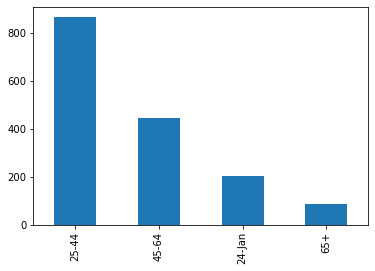

In [13]:
Tan_test["age_group"].value_counts().plot(kind="bar")

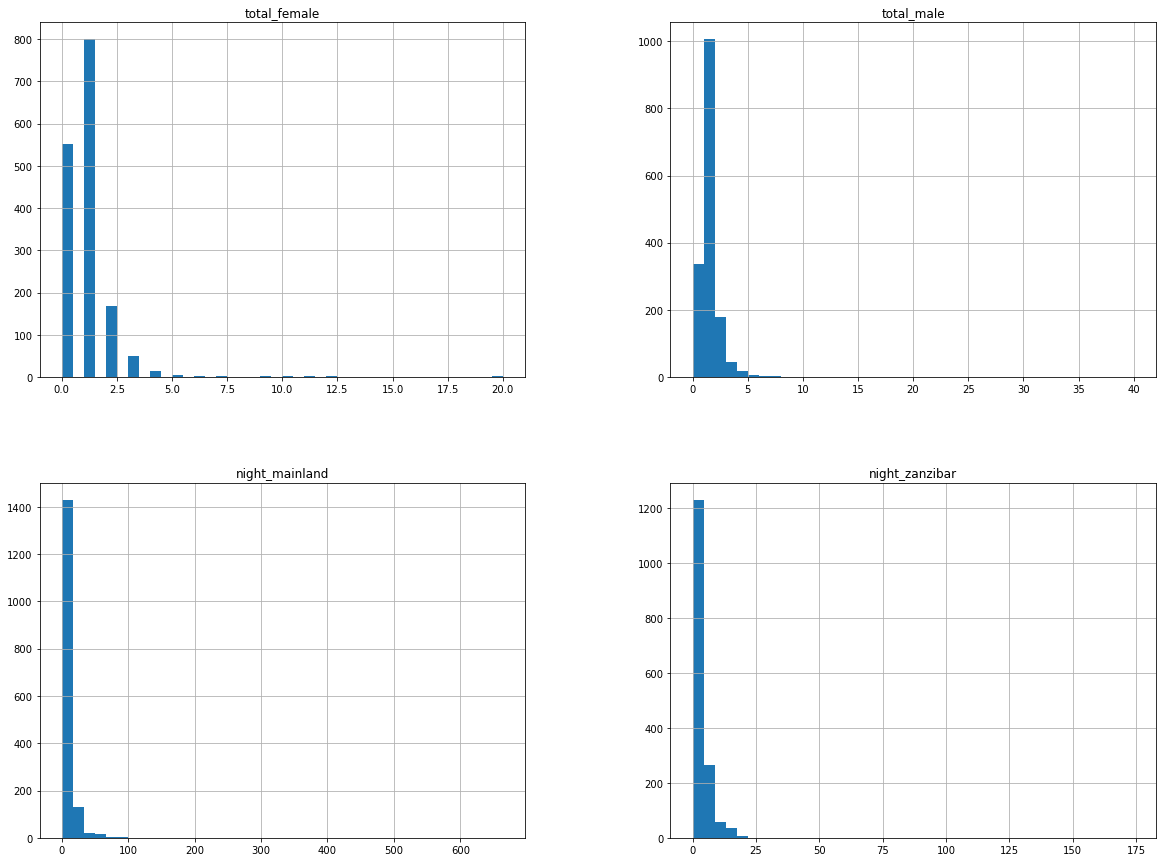

In [14]:
Tan_test.hist(bins=40, figsize=(20,15))
plt.show()

In [15]:
Tan_test.describe()

,total_female,total_male,night_mainland,night_zanzibar
count,1600.000000,1599.000000,1601.000000,1601.000000
mean,0.925625,1.056911,8.741412,2.495315
std,1.169807,1.309879,19.788490,6.266489
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000
50%,1.000000,1.000000,5.000000,0.000000
75%,1.000000,1.000000,10.000000,4.000000
max,20.000000,40.000000,664.000000,174.000000


In [16]:
Tan_test

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,tour_988,UNITED STATES OF AMERICA,25-44,NaN,0.0,1.0,Meetings and Conference,Mountain climbing,"Newspaper, magazines,brochures",Independent,...,No,No,No,No,No,1,0,Cash,No,NaN
1597,tour_990,ITALY,45-64,Spouse and Children,3.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,10,5,Other,Yes,Wildlife
1598,tour_992,FINLAND,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Friends, relatives",Independent,...,No,No,No,No,No,6,0,Cash,Yes,No comments
1599,tour_996,SOUTH AFRICA,24-Jan,Alone,0.0,1.0,Business,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,4,0,Cash,Yes,Wildlife


In [17]:
Tan_test.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

In [18]:
# Tan_test.dropna(axis=1,inplace=True)

In [19]:
Tan_test.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

In [20]:
Tan_train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [63]:
#How to drop the columns you dont want
Tan_train_data = Tan_train.drop(["ID", "country", "travel_with", "purpose", "main_activity", "info_source", "most_impressing",
                                "payment_mode"],1)
Tan_test_data = Tan_test.drop(["ID", "country", "travel_with", "purpose", "main_activity", "info_source", "most_impressing",
                                "payment_mode"],1)


Tan_train_data.head()

,age_group,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,total_cost
0,45-64,1.0,1.0,Independent,No,No,No,No,No,No,No,13.0,0.0,No,674602.5
1,25-44,1.0,0.0,Independent,No,No,No,No,No,No,No,14.0,7.0,Yes,3214906.5
2,25-44,0.0,1.0,Independent,No,No,No,No,No,No,No,1.0,31.0,No,3315000.0
3,25-44,1.0,1.0,Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Yes,7790250.0
4,1-24,1.0,0.0,Independent,No,No,No,No,No,No,No,7.0,4.0,Yes,1657500.0


In [62]:
# How to check for the details of each columns

In [22]:
Tan_train_data.age_group.unique()

array(['45-64', '25-44', '1-24', '65+'], dtype=object)

In [23]:
Tan_test_data.age_group.unique()

array(['45-64', '25-44', '24-Jan', '65+'], dtype=object)

In [61]:
# How to convert from string to interger

In [24]:
Tan_train_data.age_group =Tan_train_data.age_group.replace({'45-64':55, '25-44':35, '65+':70, '1-24':13})
Tan_train_data.package_transport_int =Tan_train_data.package_transport_int.replace({"Yes":1, "No":0})
Tan_train_data.package_accomodation = Tan_train_data.package_accomodation.replace({"Yes":1, "No":0})
Tan_train_data.package_food = Tan_train_data.package_food.replace({"Yes":1, "No":0})
Tan_train_data.package_transport_tz = Tan_train_data.package_transport_tz.replace({"Yes":1, "No":0})
Tan_train_data.package_sightseeing = Tan_train_data.package_sightseeing.replace({"Yes":1, "No":0})
Tan_train_data.package_guided_tour = Tan_train_data.package_guided_tour.replace({"Yes":1, "No":0})
Tan_train_data.package_insurance = Tan_train_data.package_insurance.replace({"Yes":1, "No":0})
Tan_train_data.first_trip_tz = Tan_train_data.first_trip_tz.replace({"Yes":1, "No":0})
Tan_train_data.tour_arrangement = Tan_train_data.tour_arrangement.replace({"Independent":1, "Package Tour":0})


Tan_test_data.age_group =Tan_test_data.age_group.replace({'24-Jan':13, '45-64':55, '25-44':35, '65+':70})
Tan_test_data.package_transport_int =Tan_test_data.package_transport_int.replace({"Yes":1, "No":0})
Tan_test_data.package_accomodation = Tan_test_data.package_accomodation.replace({"Yes":1, "No":0})
Tan_test_data.package_food = Tan_test_data.package_food.replace({"Yes":1, "No":0})
Tan_test_data.package_transport_tz = Tan_test_data.package_transport_tz.replace({"Yes":1, "No":0})
Tan_test_data.package_sightseeing = Tan_test_data.package_sightseeing.replace({"Yes":1, "No":0})
Tan_test_data.package_guided_tour = Tan_test_data.package_guided_tour.replace({"Yes":1, "No":0})
Tan_test_data.package_insurance = Tan_test_data.package_insurance.replace({"Yes":1, "No":0})
Tan_test_data.first_trip_tz = Tan_test_data.first_trip_tz.replace({"Yes":1, "No":0})
Tan_test_data.tour_arrangement = Tan_test_data.tour_arrangement.replace({"Independent":1, "Package Tour":0})

In [25]:
Tan_train_data.head()

,age_group,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,total_cost
0,55,1.0,1.0,1,0,0,0,0,0,0,0,13.0,0.0,0,674602.5
1,35,1.0,0.0,1,0,0,0,0,0,0,0,14.0,7.0,1,3214906.5
2,35,0.0,1.0,1,0,0,0,0,0,0,0,1.0,31.0,0,3315000.0
3,35,1.0,1.0,0,0,1,1,1,1,1,0,11.0,0.0,1,7790250.0
4,13,1.0,0.0,1,0,0,0,0,0,0,0,7.0,4.0,1,1657500.0


In [26]:
Tan_test_data.head()

,age_group,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz
0,55,1.0,1.0,0,1,1,1,1,1,1,1,10,3,1
1,35,0.0,4.0,0,1,1,0,0,0,0,0,13,0,0
2,35,3.0,0.0,1,0,0,0,0,0,0,0,7,14,0
3,13,2.0,0.0,1,0,0,0,0,0,0,0,0,4,1
4,55,2.0,2.0,0,1,1,1,1,0,0,0,10,0,1


In [27]:
Tan_train_data.isnull().sum()

age_group                0
total_female             3
total_male               5
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
first_trip_tz            0
total_cost               0
dtype: int64

In [28]:
Tan_train_data.shape

(4809, 15)

In [29]:
Tan_train_data.dropna(inplace=True)

In [30]:
Tan_train_data.isnull().sum()

age_group                0
total_female             0
total_male               0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
first_trip_tz            0
total_cost               0
dtype: int64

<AxesSubplot:xlabel='age_group', ylabel='count'>

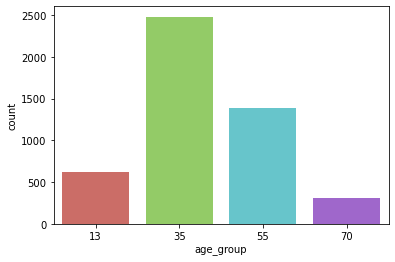

In [31]:
sb.countplot(x="age_group", data=Tan_train_data, palette="hls")

<AxesSubplot:xlabel='total_cost'>

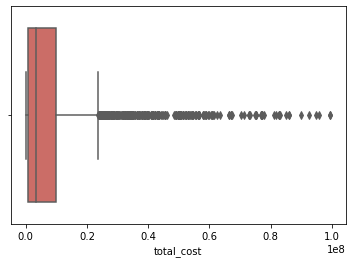

In [32]:
sb.boxplot(x="total_cost", data=Tan_train_data, palette="hls")

<AxesSubplot:>

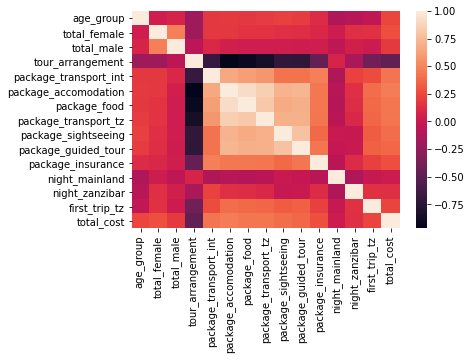

In [33]:
sb.heatmap(Tan_train_data.corr())

In [34]:
Tan_train_data.columns

Index(['age_group', 'total_female', 'total_male', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar',
       'first_trip_tz', 'total_cost'],
      dtype='object')

In [35]:
# Creating features to train and test model

In [36]:
x_features = Tan_train_data[['age_group', 'total_female', 'total_male', 'tour_arrangement','package_transport_int', 
                        'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing',
                        'package_guided_tour','package_insurance', 'night_mainland', 'night_zanzibar','first_trip_tz']]

In [37]:
Tan_train_data.total_female.mean()

0.9233493022287024

In [64]:
# How to fill the missing data with the mean or mode

Tan_train_data.total_female.fillna(Tan_train_data.total_female.mean(),inplace=True)
Tan_train_data.total_male.fillna(Tan_train_data.total_male.mean(),inplace=True)

Tan_test_data.total_female.fillna(Tan_test_data.total_female.mean(),inplace=True)
Tan_test_data.total_male.fillna(Tan_test_data.total_male.mean(),inplace=True)

In [39]:
x_features.head()

,age_group,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz
0,55,1.0,1.0,1,0,0,0,0,0,0,0,13.0,0.0,0
1,35,1.0,0.0,1,0,0,0,0,0,0,0,14.0,7.0,1
2,35,0.0,1.0,1,0,0,0,0,0,0,0,1.0,31.0,0
3,35,1.0,1.0,0,0,1,1,1,1,1,0,11.0,0.0,1
4,13,1.0,0.0,1,0,0,0,0,0,0,0,7.0,4.0,1


In [40]:
y_target = Tan_train_data["total_cost"]

In [41]:
y_target.head()

0     674602.5
1    3214906.5
2    3315000.0
3    7790250.0
4    1657500.0
Name: total_cost, dtype: float64

In [42]:
x_features.shape

(4801, 14)

In [43]:
y_target.shape

(4801,)

In [44]:
# Spliting the dataset into training and testing set which is 75% train and 25% test automatically

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, random_state=1)

In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3600, 14)
(1201, 14)
(3600,)
(1201,)


In [47]:
# Creating a Linear Regression Model

In [48]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [49]:
print(linreg.intercept_)
print(linreg.coef_)

-2829412.1621208983
[  134319.86133668  1055795.85708791   834079.33445102 -2960256.36935841
  5077822.41473103  -461076.09664899   692797.15587272  1455952.31959735
  2826134.54524009   849830.05725258   -53121.69249829    98526.95763505
   226112.47948596  1230157.48139076]


In [50]:
y_pred = linreg.predict(x_test)
y_pred

array([14777982.15818187,  2745910.59904625,    41186.82266059, ...,
       21163412.87839888,  -110599.39272562,   657011.17583768])

In [51]:
# Calculating mean square error

In [52]:
from sklearn import metrics

In [53]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

9632466.417231224


In [55]:
Tan_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_group              1601 non-null   int64  
 1   total_female           1601 non-null   float64
 2   total_male             1601 non-null   float64
 3   tour_arrangement       1601 non-null   int64  
 4   package_transport_int  1601 non-null   int64  
 5   package_accomodation   1601 non-null   int64  
 6   package_food           1601 non-null   int64  
 7   package_transport_tz   1601 non-null   int64  
 8   package_sightseeing    1601 non-null   int64  
 9   package_guided_tour    1601 non-null   int64  
 10  package_insurance      1601 non-null   int64  
 11  night_mainland         1601 non-null   int64  
 12  night_zanzibar         1601 non-null   int64  
 13  first_trip_tz          1601 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 175.2 KB


In [56]:
prediction = linreg.predict(Tan_test_data)

In [65]:
prediction

array([19730158.60268094, 11105697.08980458,  5934177.60281699, ...,
        1566925.17695649, -1585165.68772052,  4048864.30437937])

In [57]:
sub = pd.DataFrame({"test_id":Tan_sample.ID, "total_cost":prediction})

In [58]:
sub.to_csv("first_submission.csv", index=None)

In [59]:
sub.shape

(1601, 2)

In [60]:
Tan_sample.shape

(1601, 2)